# Testes com algoritmos de classificação

* Naive Bayes
* Logistic Regression
* Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('CSVs/credit_data.csv')
df.shape

(2000, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [4]:
df.dropna(inplace=True)
df.shape

(1997, 5)

In [5]:
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
df.describe()

,i#clientid,income,age,loan,c#default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.807559,4445.487716,0.141713
std,576.702206,14325.131177,13.624469,3046.792457,0.348842
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,503.000000,32804.904487,28.990415,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [7]:
X = df.iloc[:, 1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [8]:
y = df.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [31]:
result_nb = []
result_lr = []
result_rf = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                       stratify = y, random_state=i)
    
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    result_nb.append(accuracy_score(y_test,
                                   nb.predict(X_test)))
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    result_lr.append(accuracy_score(y_test,
                                   lr.predict(X_test)))
    
    rf = RandomForestClassifier(criterion='entropy')
    rf.fit(X_train, y_train)
    result_rf.append(accuracy_score(y_test,
                                   rf.predict(X_test)))

In [32]:
print(result_nb)

[0.925, 0.925, 0.9325, 0.925, 0.92, 0.905, 0.9175, 0.9175, 0.9125, 0.9325, 0.9225, 0.9125, 0.935, 0.9175, 0.925, 0.9175, 0.9275, 0.92, 0.9325, 0.92, 0.93, 0.905, 0.9175, 0.9325, 0.9425, 0.9375, 0.94, 0.92, 0.935, 0.925]


In [33]:
print(result_lr)

[0.9325, 0.91, 0.9125, 0.9225, 0.9075, 0.89, 0.91, 0.9075, 0.8775, 0.915, 0.9175, 0.9, 0.925, 0.9175, 0.9025, 0.9125, 0.9525, 0.91, 0.9225, 0.9075, 0.925, 0.905, 0.9075, 0.945, 0.9225, 0.9275, 0.9225, 0.9175, 0.91, 0.9]


In [34]:
print(result_rf)

[0.975, 0.985, 0.9825, 0.995, 0.98, 0.98, 0.985, 0.9875, 0.9825, 0.9875, 0.9825, 0.98, 0.9875, 0.9875, 0.9825, 0.9825, 0.9875, 0.9875, 0.9875, 0.985, 0.9725, 0.9825, 0.985, 0.985, 0.985, 0.9925, 0.9925, 0.9825, 0.985, 0.9875]


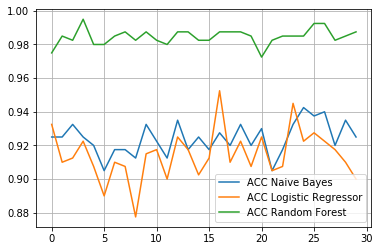

In [35]:
plt.plot(list(range(0, 30)), result_nb, label='ACC Naive Bayes')
plt.plot(list(range(0, 30)), result_lr, label='ACC Logistic Regressor')
plt.plot(list(range(0, 30)), result_rf, label='ACC Random Forest')
plt.legend()
plt.grid();

In [36]:
result_nb = np.array(result_nb)
result_lr = np.array(result_lr)
result_rf = np.array(result_rf)

In [37]:
from Models.Stats import Stats
cls_stats = Stats()

## Acurácia Média

In [38]:
print(f'Naive Bayes: {result_nb.mean()}')
print(f'Logistic Regressor: {result_lr.mean()}')
print(f'Random Forest: {result_rf.mean()}')

Naive Bayes: 0.92425
Logistic Regressor: 0.9145
Random Forest: 0.9846666666666668


In [39]:
print(f'Naive Bayes: {cls_stats.mean(result_nb)}')
print(f'Logistic Regressor: {cls_stats.mean(result_lr)}')
print(f'Random Forest: {cls_stats.mean(result_rf)}')

Naive Bayes: 0.9242500000000003
Logistic Regressor: 0.9145
Random Forest: 0.9846666666666669


## Mode

In [41]:
print(f'Naive Bayes: {stats.mode(result_nb)}')
print(f'Logistic Regressor: {stats.mode(result_lr)}')
print(f'Random Forest: {stats.mode(result_rf)}')

Naive Bayes: ModeResult(mode=array([0.9175]), count=array([5]))
Logistic Regressor: ModeResult(mode=array([0.9075]), count=array([4]))
Random Forest: ModeResult(mode=array([0.9875]), count=array([8]))


In [42]:
print(f'Naive Bayes: {cls_stats.mode(result_nb)}')
print(f'Logistic Regressor: {cls_stats.mode(result_lr)}')
print(f'Random Forest: {cls_stats.mode(result_rf)}')

Naive Bayes: (array([0.9175, 0.925 ]), 5)
Logistic Regressor: (array([0.9075, 0.91  , 0.9225]), 4)
Random Forest: (array([0.9875]), 8)


## Mediana

In [43]:
print(f'Naive Bayes: {np.median(result_nb)}')
print(f'Logistic Regressor: {np.median(result_lr)}')
print(f'Random Forest: {np.median(result_rf)}')

Naive Bayes: 0.925
Logistic Regressor: 0.9125
Random Forest: 0.985


In [44]:
print(f'Naive Bayes: {cls_stats.median(result_nb)}')
print(f'Logistic Regressor: {cls_stats.median(result_lr)}')
print(f'Random Forest: {cls_stats.median(result_rf)}')

Naive Bayes: 0.925
Logistic Regressor: 0.9125
Random Forest: 0.985


## Variância

In [45]:
np.set_printoptions(suppress=True)
print(f'Naive Bayes: {np.var(result_nb)}')
print(f'Logistic Regressor: {np.var(result_lr)}')
print(f'Random Forest: {np.var(result_rf)}')

Naive Bayes: 8.756250000000001e-05
Logistic Regressor: 0.00020933333333333337
Random Forest: 2.1138888888888968e-05


In [46]:
print(f'Naive Bayes: {cls_stats.variance(result_nb)}')
print(f'Logistic Regressor: {cls_stats.variance(result_lr)}')
print(f'Random Forest: {cls_stats.variance(result_rf)}')

Naive Bayes: 8.756250000000001e-05
Logistic Regressor: 0.00020933333333333337
Random Forest: 2.1138888888888964e-05


In [47]:
np.min([cls_stats.variance(result_nb), cls_stats.variance(result_lr), cls_stats.variance(result_rf)])

2.1138888888888964e-05

In [48]:
np.max([cls_stats.variance(result_nb), cls_stats.variance(result_lr), cls_stats.variance(result_rf)])

0.00020933333333333337

## Desvio Padrão

In [52]:
print(f'Naive Bayes: {np.std(result_nb)}')
print(f'Logistic Regressor: {np.std(result_lr)}')
print(f'Random Forest: {np.std(result_rf)}')

Naive Bayes: 0.00935748363610645
Logistic Regressor: 0.014468356276140472
Random Forest: 0.004597704741377916


In [49]:
print(f'Naive Bayes: {cls_stats.std_deviation(result_nb)}')
print(f'Logistic Regressor: {cls_stats.std_deviation(result_lr)}')
print(f'Random Forest: {cls_stats.std_deviation(result_rf)}')

Naive Bayes: 0.00935748363610645
Logistic Regressor: 0.014468356276140472
Random Forest: 0.004597704741377915


## Coeficiente de Variação

In [55]:
print(f'Naive Bayes: {stats.variation(result_nb) * 100}')
print(f'Logistic Regressor: {stats.variation(result_lr) * 100}')
print(f'Random Forest: {stats.variation(result_rf) * 100}')

Naive Bayes: 1.0124407504578252
Logistic Regressor: 1.5821056616884057
Random Forest: 0.46693006852179236


In [53]:
print(f'Naive Bayes: {cls_stats.coef_deviation(result_nb)}')
print(f'Logistic Regressor: {cls_stats.coef_deviation(result_lr)}')
print(f'Random Forest: {cls_stats.coef_deviation(result_rf)}')

Naive Bayes: 1.012440750457825
Logistic Regressor: 1.5821056616884057
Random Forest: 0.4669300685217922
